In [6]:
import numpy as np
import matplotlib.pyplot as plt

from stoneforge.datasets import dataload
from stoneforge.pseudo_wells import pseudo_tools

# REFS:
# https://github.com/ana-carolinaa - TCC
# https://sbgf.org.br/mysbgf/eventos/expanded_abstracts/17th_CISBGf/172220210302023150influence_of_clay_volume_estimation_on_netpay_2021.pdf
# https://www.cambridge.org/core/books/seismic-reflections-of-rock-properties/79680145E8B02CF09F1514A15121AFF9

In [2]:
IK1,unik1 = dataload.ik1()

IK1_c = IK1[~IK1.isin([-999.0]).any(axis=1)]
IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


In [3]:
LEDGE_SANDSTONE = IK1_c[IK1_c['DEPT'].between(10619, 10842)]
LEDGE_SANDSTONE

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
21076,10619.0,-92.3719,5.6534,7.5047,10.3189,32.1681,9.5756,2.4324,0.0280,18.5964,74.0643
21077,10619.5,-92.6030,5.4512,7.1849,9.8774,29.9718,9.5682,2.4169,0.0243,18.5066,73.7811
21078,10620.0,-92.8108,5.2563,6.9832,9.3140,28.8898,9.5609,2.4278,0.0214,18.2585,73.3278
21079,10620.5,-93.0186,5.0684,6.7872,8.3432,28.8571,9.5536,2.4187,0.0232,18.0104,72.9256
21080,10621.0,-93.2263,4.9828,6.7115,7.1612,29.6683,9.5463,2.3921,0.0221,17.8458,73.9007
...,...,...,...,...,...,...,...,...,...,...,...
21518,10840.0,-84.3232,15.8031,24.9516,38.3127,38.1211,9.6802,2.5684,0.0246,9.2279,65.8097
21519,10840.5,-83.6495,18.1204,25.9377,29.7650,36.1407,9.6372,2.5561,0.0323,8.8146,63.3392
21520,10841.0,-82.9757,23.8513,37.9959,22.8938,36.0931,9.5941,2.5345,0.0364,8.6617,63.0884
21521,10841.5,-82.3019,24.9165,54.6157,25.3613,37.6945,9.5790,2.5176,0.0275,8.5357,63.5907


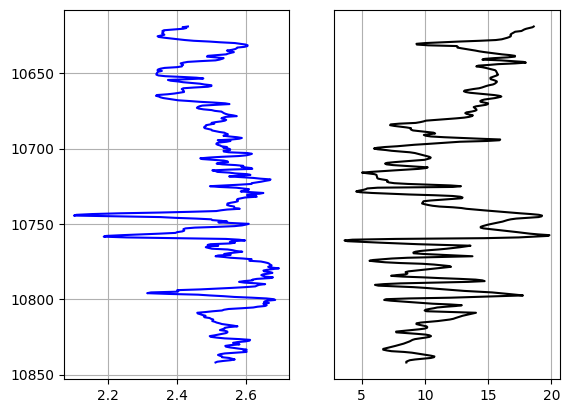

In [4]:
plt.subplot(1,2,1)
plt.gca().invert_yaxis()
plt.plot(LEDGE_SANDSTONE['RHOB'],LEDGE_SANDSTONE['DEPT'],'b')
plt.grid()

plt.subplot(1,2,2)
plt.gca().invert_yaxis()
plt.plot(LEDGE_SANDSTONE['NPHI'],LEDGE_SANDSTONE['DEPT'],'k')
plt.yticks([])
plt.grid()

In [7]:
LEDGE_SANDSTONE['RHOB']

21076    2.4324
21077    2.4169
21078    2.4278
21079    2.4187
21080    2.3921
          ...  
21518    2.5684
21519    2.5561
21520    2.5345
21521    2.5176
21522    2.5125
Name: RHOB, Length: 447, dtype: float64

In [10]:
mu_rhob = np.mean(LEDGE_SANDSTONE['RHOB'])
mu_nphi = np.mean(LEDGE_SANDSTONE['NPHI'])

mean_vector = np.array([mu_rhob, mu_nphi])

S = pseudo_tools.cov_matrix(np.array([
    np.array(LEDGE_SANDSTONE['RHOB']),
    np.array(LEDGE_SANDSTONE['NPHI'])
]))

print(mean_vector)
print()
print(S)

[ 2.51875302 11.71424899]

[[ 9.63282904e-03 -2.44845355e-01]
 [-2.44845355e-01  1.30006825e+01]]


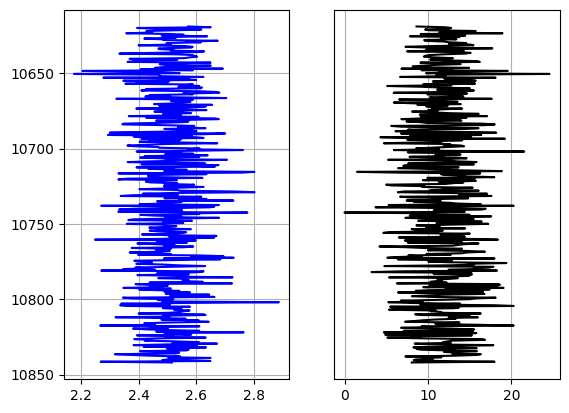

In [12]:
num_samples = int(len(LEDGE_SANDSTONE))
samples = np.random.multivariate_normal(mean_vector, S, num_samples)

rhob_samples = samples[:, 0]
nphi_samples = samples[:, 1]

depth = np.linspace(10619, 10842, num_samples)

plt.subplot(1,2,1)
plt.gca().invert_yaxis()
plt.plot(rhob_samples,depth,'b')
plt.grid()

plt.subplot(1,2,2)
plt.gca().invert_yaxis()
plt.plot(nphi_samples,depth,'k')
plt.yticks([])
plt.grid()

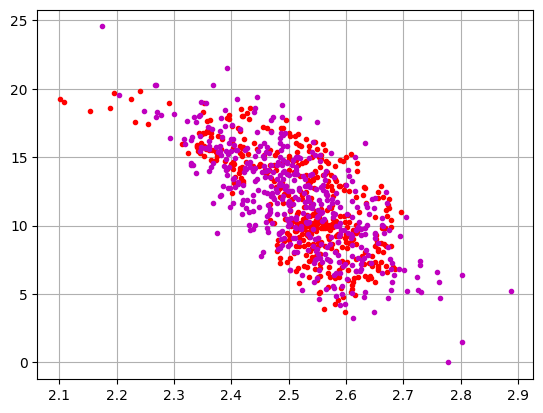

In [21]:
plt.plot(LEDGE_SANDSTONE['RHOB'],LEDGE_SANDSTONE['NPHI'],'.r')
plt.plot(rhob_samples,nphi_samples,'.m')
plt.grid()
plt.show()